In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
    

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
cancer_df = pd.read_csv('datasets/global_cancer_patients_2015_2024.csv')
print(cancer_df.head(10))
print(cancer_df.describe)
print(cancer_df.info())
    

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   
5  PT0000005   22    Male        Germany  2018           9.5            6.4   
6  PT0000006   41    Male         Canada  2021           5.1            8.2   
7  PT0000007   72  Female         Canada  2018           6.0            8.2   
8  PT0000008   21    Male            USA  2022           4.3            3.8   
9  PT0000009   49  Female         Canada  2016           8.1            0.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III

In [18]:
from data_util import startingall

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
cancer_df = cancer_df.drop('Year', axis=1)
cancer_df = cancer_df.drop('Patient_ID', axis=1)




In [33]:
cancer_df

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80,Male,Pakistan,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,40,Female,USA,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,74,Male,Pakistan,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,21,Male,Brazil,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


## Train, val, test set selection

In [34]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(cancer_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (32000, 13)
val_df.shape : (8000, 13)
test_df.shape : (10000, 13)


In [71]:
input_cols = list(cancer_df.columns)
input_cols.remove('Cancer_Type')
target_col = 'Cancer_Type'
input_cols

['Age',
 'Gender',
 'Country_Region',
 'Genetic_Risk',
 'Air_Pollution',
 'Alcohol_Use',
 'Smoking',
 'Obesity_Level',
 'Cancer_Stage',
 'Treatment_Cost_USD',
 'Survival_Years',
 'Target_Severity_Score']

In [91]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

print(numeric_cols)



['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']


In [92]:
fig = px.histogram(cancer_df, x ='Age',marginal='box', title='Age', color='Gender' )
fig.update_layout(bargap=0.1)
fig.show()

In [93]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(cancer_df[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


## Scaling numeric features

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(cancer_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs.describe().loc[['min', 'max']]


,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000060,0.0,0.006053
max,1.0,1.0,1.0,1.0,1.0,1.0,0.999984,1.0,0.947942


## Encoding

In [95]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))



In [96]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


In [97]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]


## Training and Visualizing DECISION TREES

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(X_train)
train_preds

array(['Breast', 'Cervical', 'Skin', ..., 'Lung', 'Prostate', 'Breast'],
      shape=(32000,), dtype=object)

In [82]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(32000, 8))

In [83]:
accuracy_score(train_targets, train_preds)

1.0

In [99]:
model.score(X_val, val_targets)

0.12625

In [100]:
model.score(X_test, test_targets)

0.1263

In [103]:
val_targets.value_counts()/ len(val_targets)

Cancer_Type
Colon       0.129750
Cervical    0.125625
Liver       0.125250
Skin        0.124500
Leukemia    0.123875
Lung        0.123750
Prostate    0.123750
Breast      0.123500
Name: count, dtype: float64

[Text(0.5, 0.8333333333333334, 'Smoking <= 0.195\ngini = 0.875\nsamples = 32000\nvalue = [3939.0, 3986.0, 4055.0, 4042.0, 3988.0, 3939.0, 4049.0\n4002.0]'),
 Text(0.25, 0.5, 'Treatment_Cost_USD <= 0.143\ngini = 0.875\nsamples = 6229\nvalue = [754.0, 768.0, 808.0, 789.0, 707.0, 818.0, 833.0, 752.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Alcohol_Use <= 0.985\ngini = 0.875\nsamples = 25771\nvalue = [3185.0, 3218.0, 3247.0, 3253.0, 3281.0, 3121.0, 3216.0\n3250.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

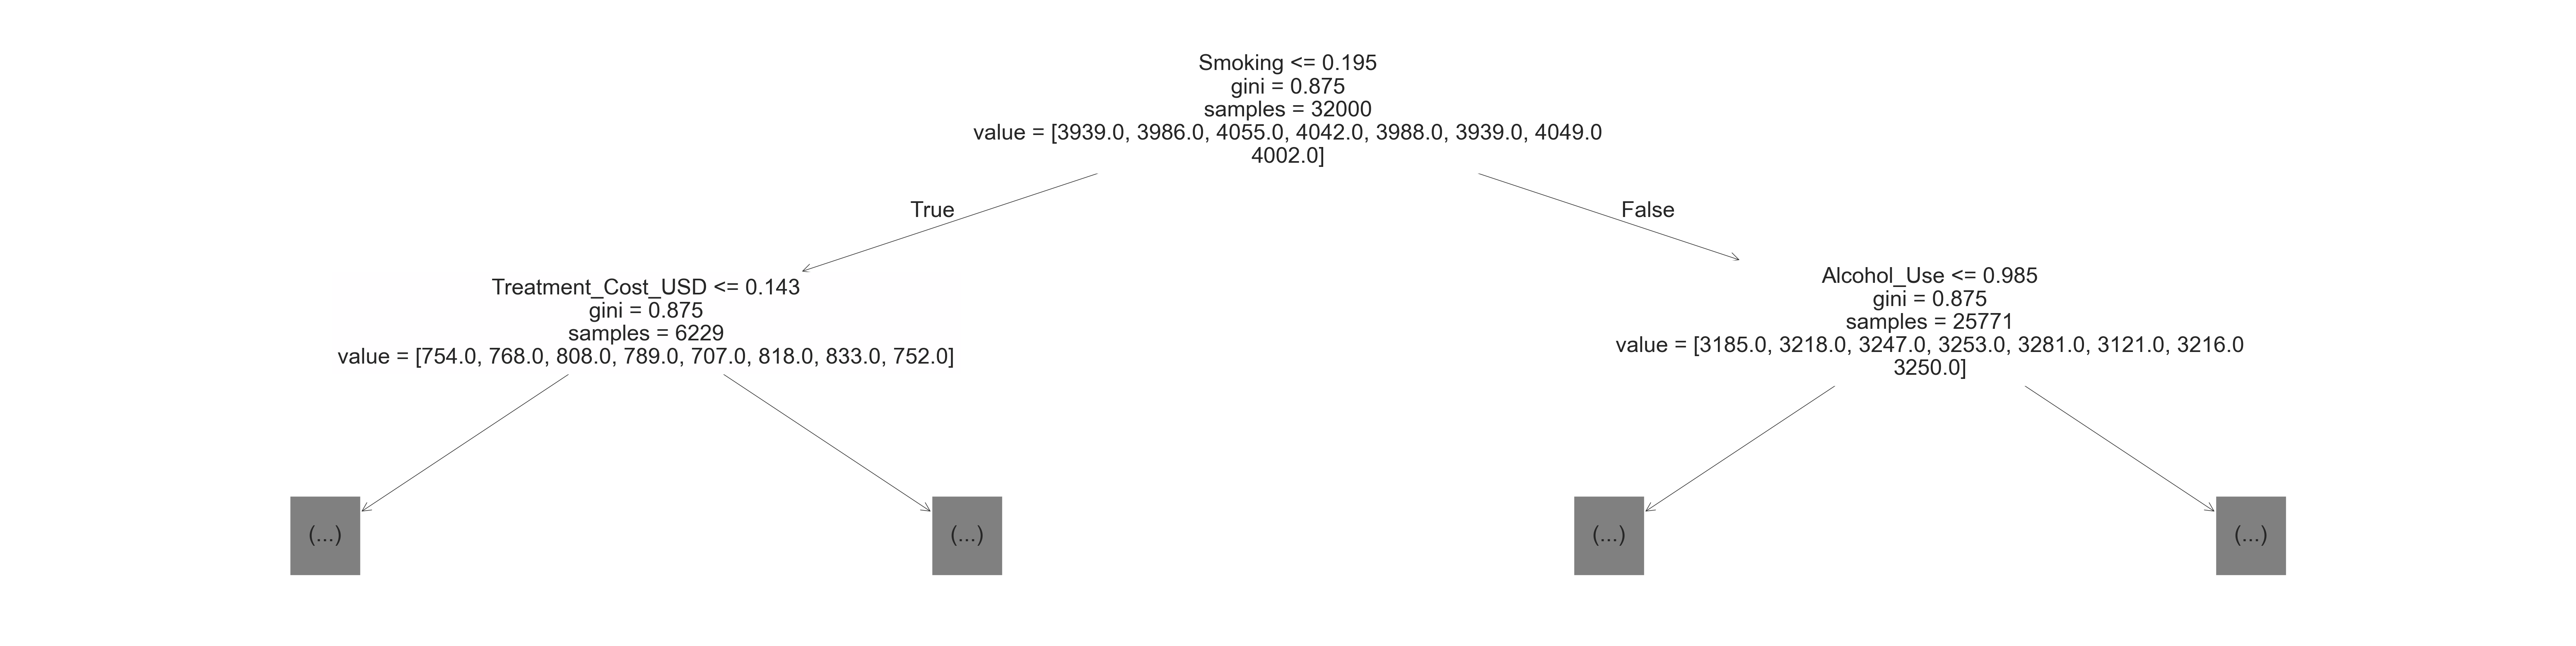

In [105]:
from sklearn.tree import plot_tree, export_text 
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=1,filled=True)

In [106]:
model.tree_.max_depth


53

In [107]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Smoking <= 0.20
|   |--- Treatment_Cost_USD <= 0.14
|   |   |--- Obesity_Level <= 0.93
|   |   |   |--- Survival_Years <= 0.09
|   |   |   |   |--- Treatment_Cost_USD <= 0.13
|   |   |   |   |   |--- Gender_Other <= 0.50
|   |   |   |   |   |   |--- Air_Pollution <= 0.38
|   |   |   |   |   |   |   |--- Treatment_Cost_USD <= 0.04
|   |   |   |   |   |   |   |   |--- Smoking <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: Skin
|   |   |   |   |   |   |   |   |--- Smoking >  0.13
|   |   |   |   |   |   |   |   |   |--- class: Prostate
|   |   |   |   |   |   |   |--- Treatment_Cost_USD >  0.04
|   |   |   |   |   |   |   |   |--- Obesity_Level <= 0.21
|   |   |   |   |   |   |   |   |   |--- Age <= 0.46
|   |   |   |   |   |   |   |   |   |   |--- class: Breast
|   |   |   |   |   |   |   |   |   |--- Age >  0.46
|   |   |   |   |   |   |   |   |   |   |--- class: Liver
|   |   |   |   |   |   |   |   |--- Obesity_Level >  0.21
|   |   |   |   |   |   |   |   |   |--- Genet

In [108]:
model.feature_importances_

array([0.08558793, 0.08773877, 0.08450103, 0.08772482, 0.07903564,
       0.08963498, 0.10347147, 0.09588017, 0.09069845, 0.01522032,
       0.0159586 , 0.01560918, 0.00941867, 0.00781652, 0.00811132,
       0.00892204, 0.00908791, 0.00903994, 0.00843803, 0.00967245,
       0.0079295 , 0.00855477, 0.01363527, 0.0120641 , 0.0123847 ,
       0.0118149 , 0.01204853])

In [109]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
6,Treatment_Cost_USD,0.103471
7,Survival_Years,0.095880
8,Target_Severity_Score,0.090698
5,Obesity_Level,0.089635
1,Genetic_Risk,0.087739
3,Alcohol_Use,0.087725
0,Age,0.085588
2,Air_Pollution,0.084501
4,Smoking,0.079036
10,Gender_Male,0.015959


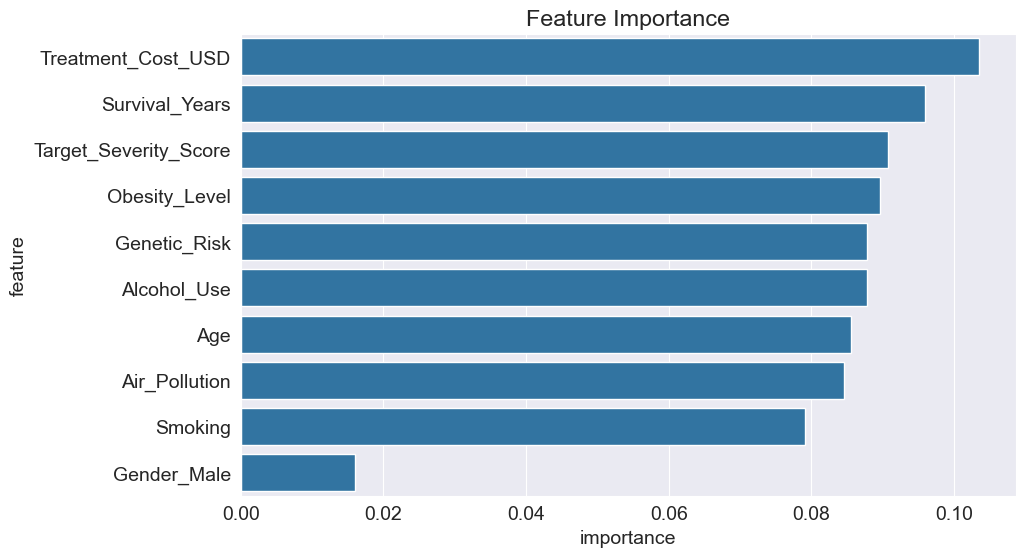

In [110]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning, Overfitting

In [111]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [189]:
model = DecisionTreeClassifier(max_depth=20, max_leaf_nodes=2**9, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=512, random_state=42)

In [190]:
model.score(X_val, val_targets)

0.131875

In [192]:
model.score(X_test,test_targets)

0.1274

## Training Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [198]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 25.7 s
Wall time: 3min 2s


RandomForestClassifier(random_state=42)

In [199]:
model.score(X_train, train_targets)

1.0

In [200]:
model.score(X_val, val_targets)

0.123125

In [201]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.65, 0.06, 0.05, ..., 0.04, 0.05, 0.03],
       [0.07, 0.71, 0.02, ..., 0.06, 0.07, 0.02],
       [0.09, 0.04, 0.02, ..., 0.03, 0.03, 0.72],
       ...,
       [0.05, 0.01, 0.02, ..., 0.71, 0.05, 0.07],
       [0.02, 0.04, 0.05, ..., 0.03, 0.65, 0.12],
       [0.66, 0.03, 0.06, ..., 0.04, 0.04, 0.07]], shape=(32000, 8))